In [1]:
import torch
import numpy as np
import scipy.integrate
solver = scipy.integrate.solve_ivp
from numpy import sin, cos 
import matplotlib.pyplot as plt
import random


seed = 3
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
torch.backends.cudnn.determinstic = True

In [ ]:
#parameters
k1 = 3.0
k2 = 5.0
m1 = 1.0
m2 = 2.0
l1 = 1.0
l2 = 1.0

def func(t, state):
  dvdt = np.zeros_like(state)
  dvdt[0] = state[2]
  dvdt[1] = state[3]
  dvdt[2] = (-k1*(state[0]-l1)+k2*(state[1]-state[0]-l2))/m1
  dvdt[3] = -k2*(state[1]-state[0]-l2)/m2
  return dvdt

M = 100
tend = 5.0
t_eval = np.linspace(0,tend,M)
dt = t_eval[1]-t_eval[0]


num = 1000
x1_init = np.random.randn(num)
x2_init = np.random.randn(num)
#print(x1)
v1_init = np.random.randn(num)
v2_init = np.random.randn(num)
state = []
for i in range(num):
  s = (x1_init[i], v1_init[i], x2_init[i], v2_init[i])
  state.append(s)
#print(state)
p1 = []
v1 = []
p2 = []
v2 = []
flag = False
for i in range(num):
  sol = solver(func, [0, tend], state[i], t_eval=t_eval)
  tval = sol['t']
  dv1dt = sol['y'][0], sol['y'][1]
  dv2dt = sol['y'][2], sol['y'][3]
  p1 = dv1dt[0]
  v1 = dv1dt[1] 
  p2 = dv2dt[0]
  v2 = dv2dt[1]
  q1 = sol['y'][0]
  q2 = sol['y'][1]
  v1 = sol['y'][2]
  v2 = sol['y'][3]
  xval = np.vstack([q1, q2, v1, v2])
  dxdt = func(tval, xval)
  if flag:
    x_input = np.concatenate([x_input, xval], 1)
    x_target = np.concatenate([x_target, dxdt], 1)
  else:
    x_input = xval
    x_target = dxdt
    flag = True

x_target_max = np.abs(x_target).max(axis=1)
x_input_max = np.abs(x_input).max(axis=1)
A = np.diag(x_target_max)
B = np.diag(x_input_max) # Now B differs from A!

print('A:', A)
print('B:', B)

x_input_scaled = np.matmul(np.linalg.inv(B),x_input)
x_target_scaled = np.linalg.inv(A)@x_target

A: [[11.71669756  0.          0.          0.        ]
 [ 0.          6.26448726  0.          0.        ]
 [ 0.          0.         33.551158    0.        ]
 [ 0.          0.          0.         13.19555807]]
B: [[ 6.46027151  0.          0.          0.        ]
 [ 0.          7.0247443   0.          0.        ]
 [ 0.          0.         11.71669756  0.        ]
 [ 0.          0.          0.          6.26448726]]


In [3]:
target_file = np.savetxt("target_ms_sep_sc.csv", x_target_scaled.T, delimiter=',')
input_file = np.savetxt("input_ms_sep_sc.csv", x_input_scaled.T, delimiter=',')

In [4]:
A_file = np.savetxt("A_ms_sep_sc.csv", A, delimiter=',')
B_file = np.savetxt("B_ms_sep_sc.csv", B, delimiter=',')

In [5]:
import numpy as np
import pandas as pd
A = pd.read_csv("./A_ms_sep_sc.csv", header=None, dtype=np.float32)
B = pd.read_csv("./B_ms_sep_sc.csv", header=None, dtype=np.float32)
A = np.asmatrix(A)
B = np.asmatrix(B)
x_input_scaled = pd.read_csv("./input_ms_sep_sc.csv", header=None, dtype=np.float32)
x_target_scaled = pd.read_csv("./target_ms_sep_sc.csv", header=None, dtype=np.float32)
x_input_scaled = np.asmatrix(x_input_scaled)
x_target_scaled = np.asmatrix(x_target_scaled)

print('A matrix:\n', A)
print('B matrix:\n', B)
print('x_input_scaled shape:', x_input_scaled.shape)
print('x_target_scaled shape:', x_target_scaled.shape)

A matrix:
 [[11.716698   0.         0.         0.       ]
 [ 0.         6.2644873  0.         0.       ]
 [ 0.         0.        33.55116    0.       ]
 [ 0.         0.         0.        13.195559 ]]
B matrix:
 [[ 6.4602714  0.         0.         0.       ]
 [ 0.         7.0247445  0.         0.       ]
 [ 0.         0.        11.716698   0.       ]
 [ 0.         0.         0.         6.2644873]]
x_input_scaled shape: (100000, 4)
x_target_scaled shape: (100000, 4)


x_input_original shape: (100000, 4)
x_target_original shape: (100000, 4)
Sample 0 / 1000 processed.
x_input_original slice shape: (100, 4)


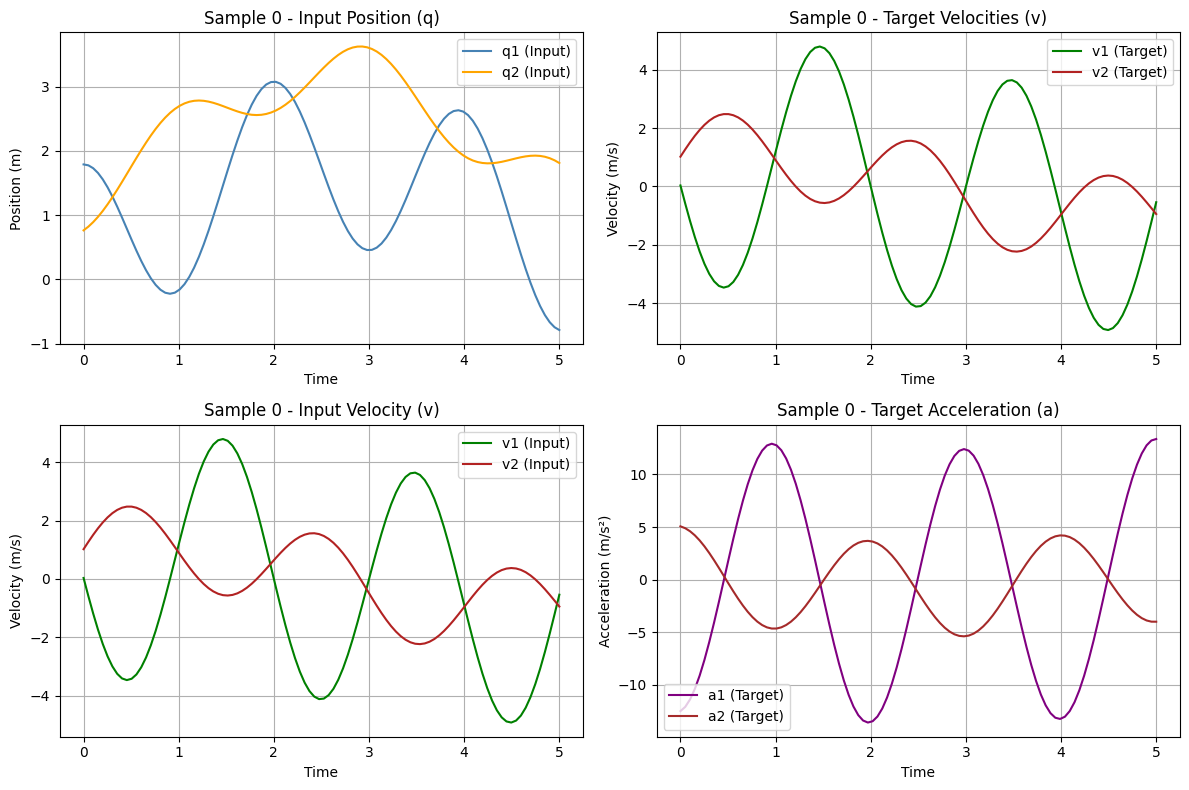

Sample 250 / 1000 processed.
x_input_original slice shape: (100, 4)


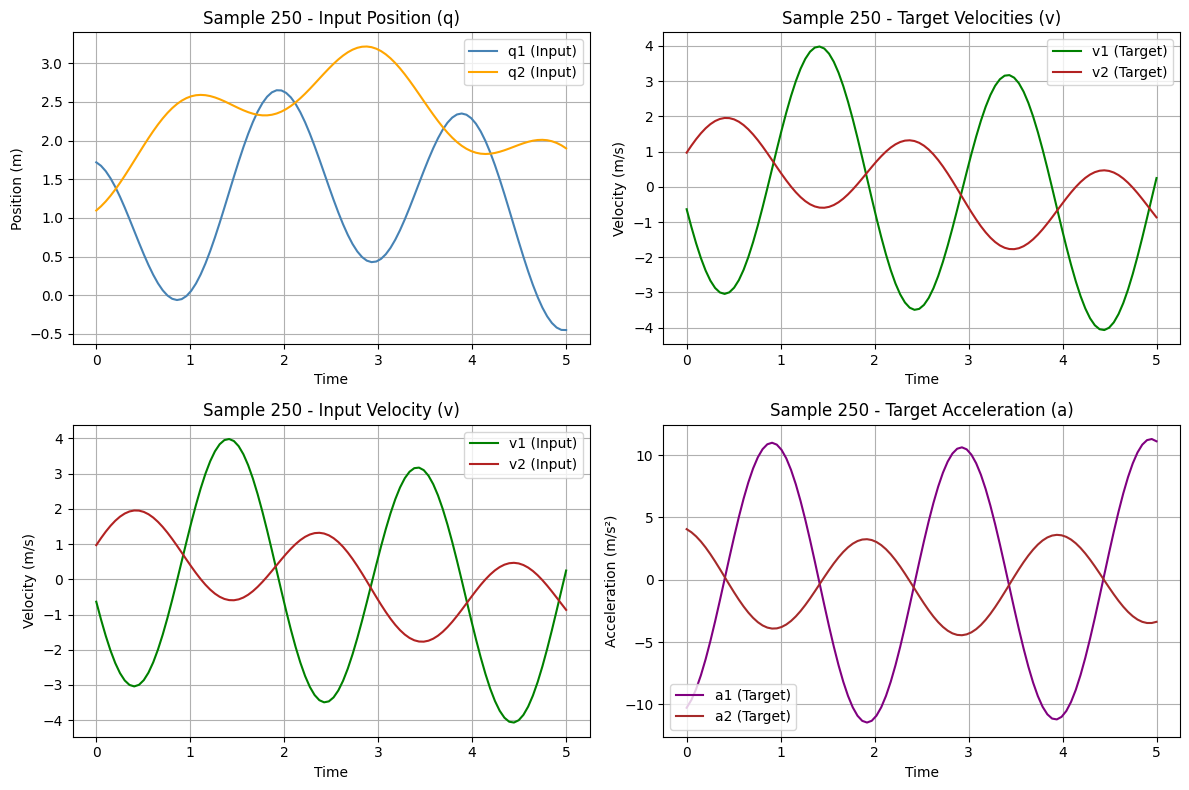

Sample 500 / 1000 processed.
x_input_original slice shape: (100, 4)


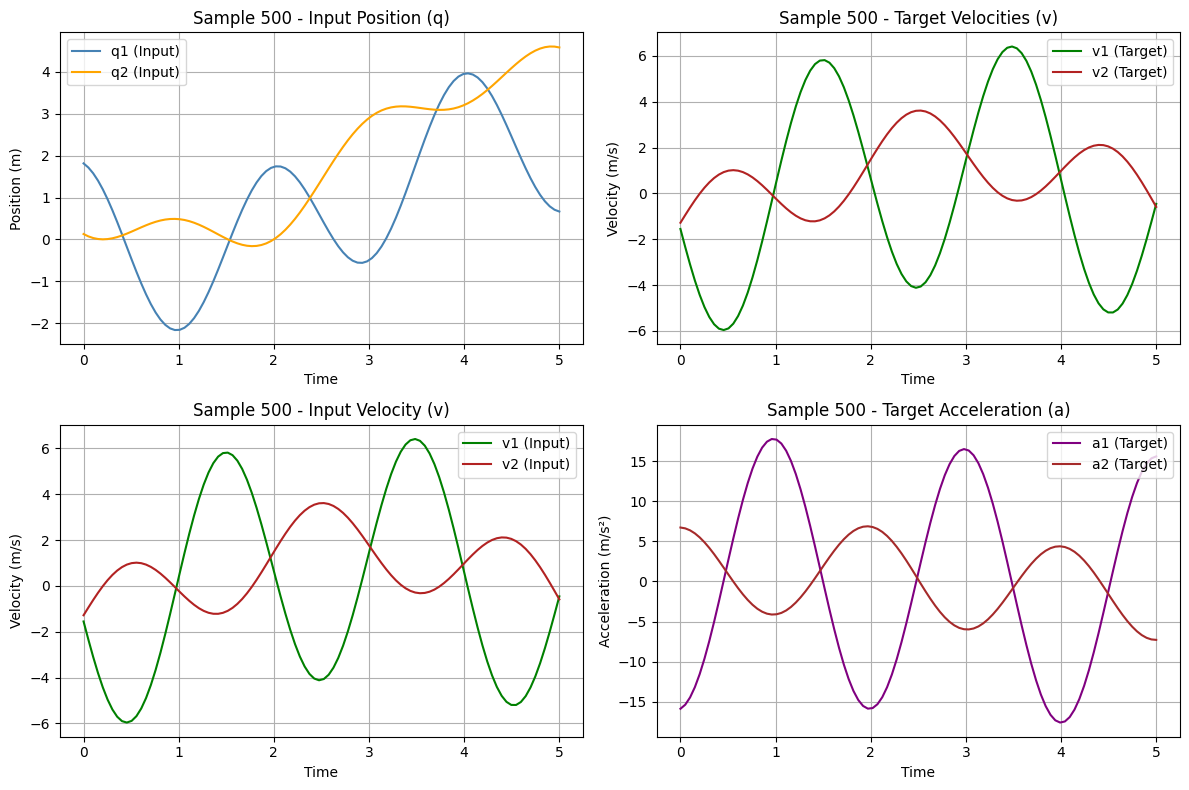

Sample 750 / 1000 processed.
x_input_original slice shape: (100, 4)


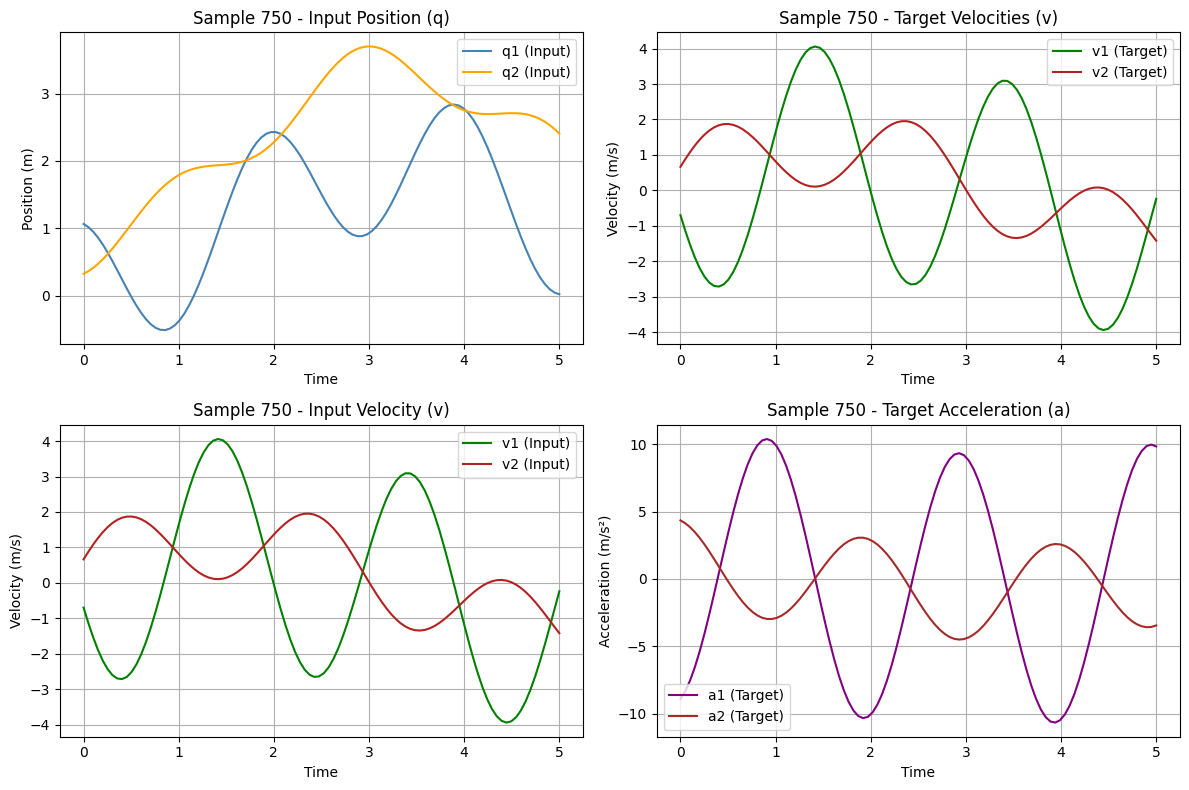

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

#　the time grid
M = 100
tend = 5.0
t_eval = np.linspace(0,tend,M)
dt = t_eval[1]-t_eval[0]
num = 1000 # number of samples for initial state vector
x_input_original = B @ x_input_scaled.T
x_input_original = x_input_original.T
x_target_original = A @ x_target_scaled.T # Now B differs from A
x_target_original = x_target_original.T
print('x_input_original shape:', x_input_original.shape)
print('x_target_original shape:', x_target_original.shape)  

for i in range(num):
  if i % 250 == 0:
    print(f'Sample {i} / {num} processed.')
    print('x_input_original slice shape:', x_input_original[i*M:(i+1)*M, :].shape)

    plt.figure(figsize=(12, 8)) # 2x2 layout
    # Subplot 1 (Top-Left): Input q1, q2 (Position)
    plt.subplot(2, 2, 1)
    plt.title(f'Sample {i} - Input Position (q)')
    plt.plot(t_eval, x_input_original[i*M:(i+1)*M, 0], label='q1 (Input)', color='steelblue')
    plt.plot(t_eval, x_input_original[i*M:(i+1)*M, 1], label='q2 (Input)', color='orange')
    plt.xlabel('Time')
    plt.ylabel('Position (m)')
    plt.grid(True)
    plt.legend()

    # Subplot 2 (Top-Right): Derivatives of Target q (i.e., dq1/dt, dq2/dt: Velocity)
    plt.subplot(2, 2, 2)
    plt.title(f'Sample {i} - Target Velocities (v)')
    plt.plot(t_eval, x_target_original[i*M:(i+1)*M, 0], label='v1 (Target)', color='g')
    plt.plot(t_eval, x_target_original[i*M:(i+1)*M, 1], label='v2 (Target)', color='firebrick')
    plt.xlabel('Time')
    plt.ylabel('Velocity (m/s)')
    plt.grid(True)
    plt.legend()


    # Subplot 3 (Bottom-Left): Input v1, v2
    # Since v1, v2 of Input are derivatives of q, they are the same as v, v2 of Top-Left.
    plt.subplot(2, 2, 3)
    plt.title(f'Sample {i} - Input Velocity (v)')
    plt.plot(t_eval, x_input_original[i*M:(i+1)*M, 2], label='v1 (Input)', color='g')
    plt.plot(t_eval, x_input_original[i*M:(i+1)*M, 3], label='v2 (Input)', color='firebrick')
    plt.xlabel('Time')
    plt.ylabel('Velocity (m/s)')
    plt.grid(True)
    plt.legend()

    # Subplot 4 (Bottom-Right): Derivative of Target v (i.e., dv1/dt, dv2/dt: Acceleration)
    plt.subplot(2, 2, 4)
    plt.title(f'Sample {i} - Target Acceleration (a)')
    plt.plot(t_eval, x_target_original[i*M:(i+1)*M, 2], label='a1 (Target)', color='purple')
    plt.plot(t_eval, x_target_original[i*M:(i+1)*M, 3], label='a2 (Target)', color='brown')
    plt.xlabel('Time')
    plt.ylabel('Acceleration (m/s²)')
    plt.grid(True)
    plt.legend()


    plt.tight_layout() # 서브플롯 간의 간격 자동 조정
    plt.show()


Sample 0 / 1000 processed.


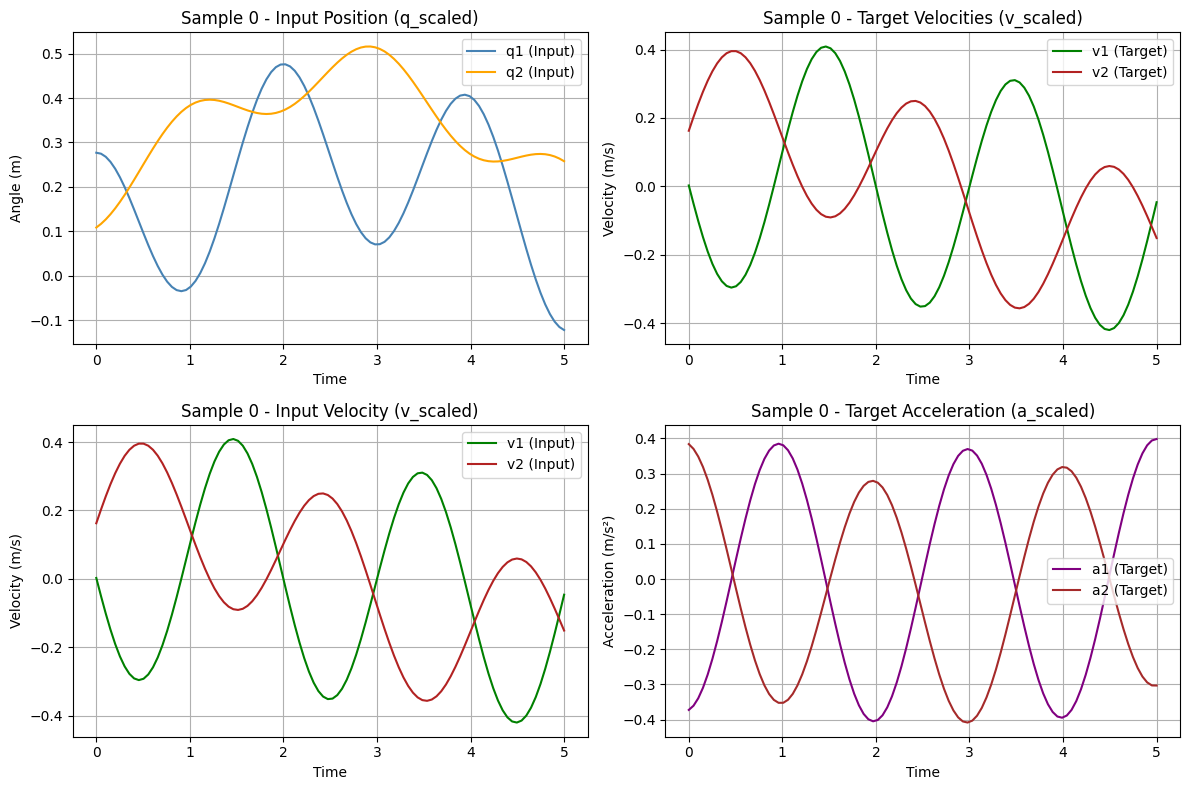

Sample 250 / 1000 processed.


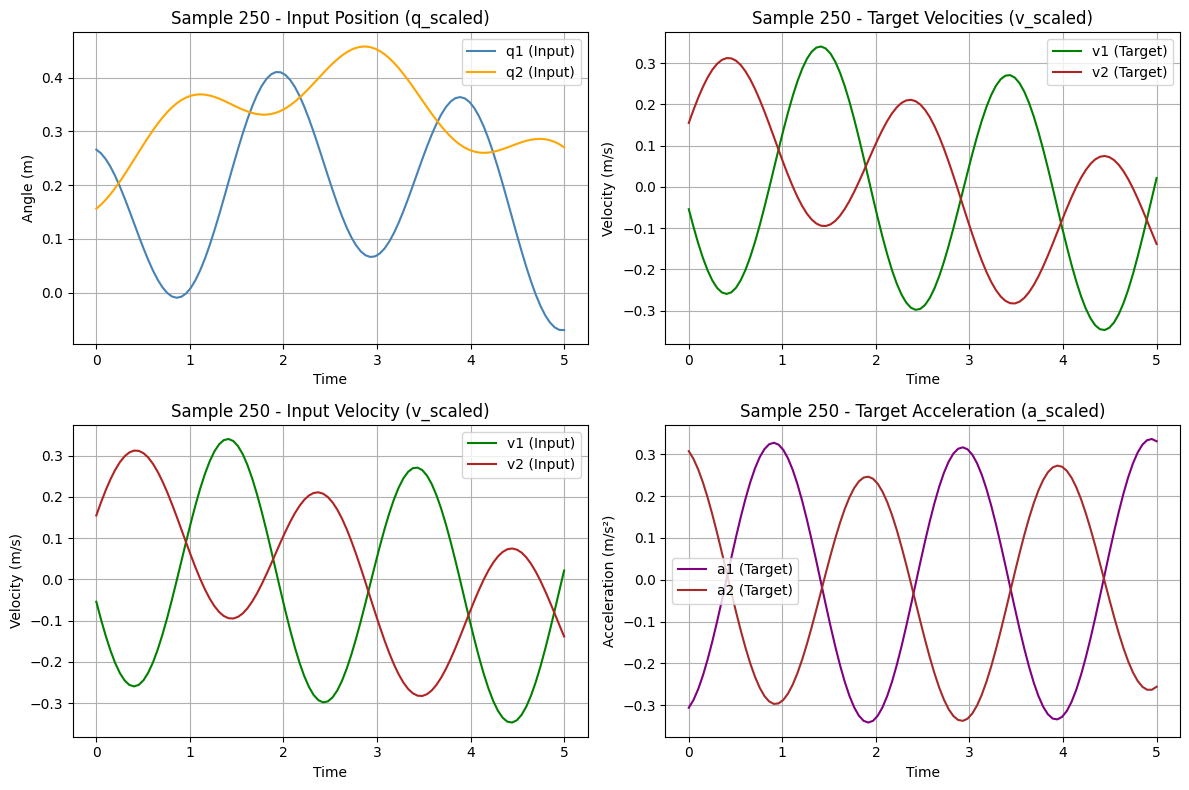

Sample 500 / 1000 processed.


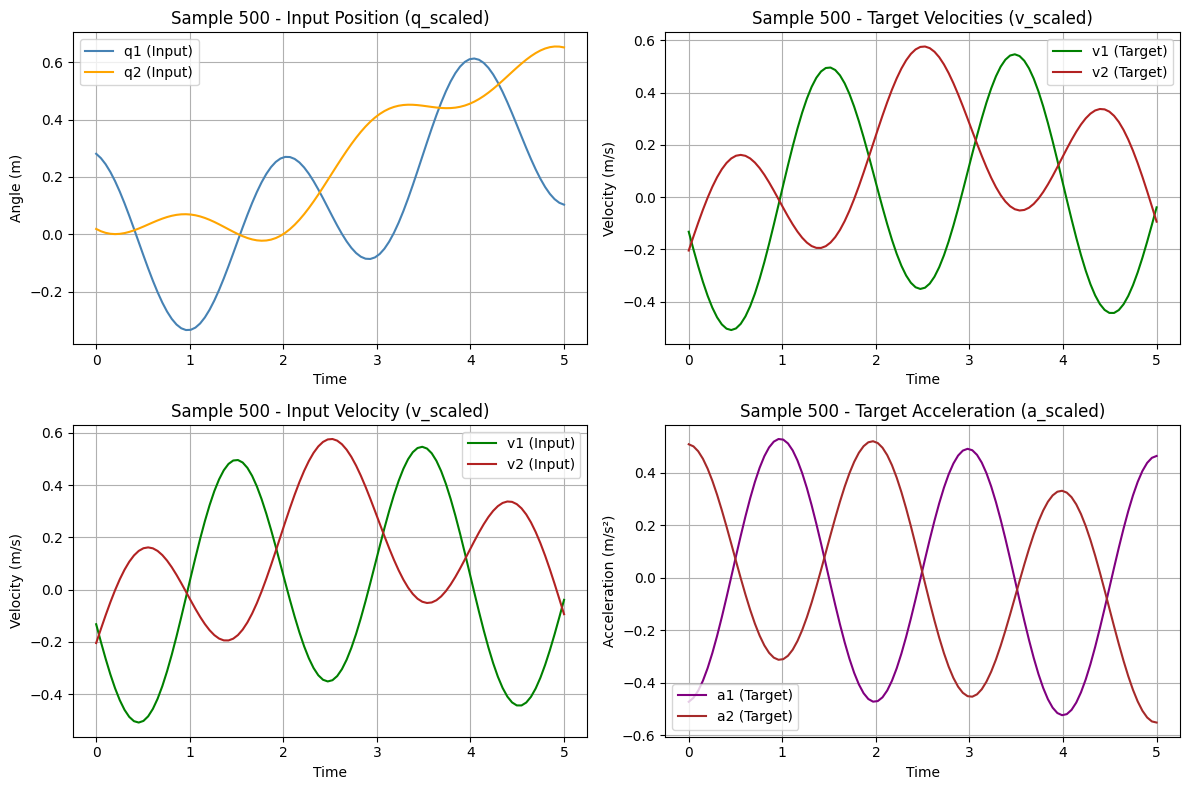

Sample 750 / 1000 processed.


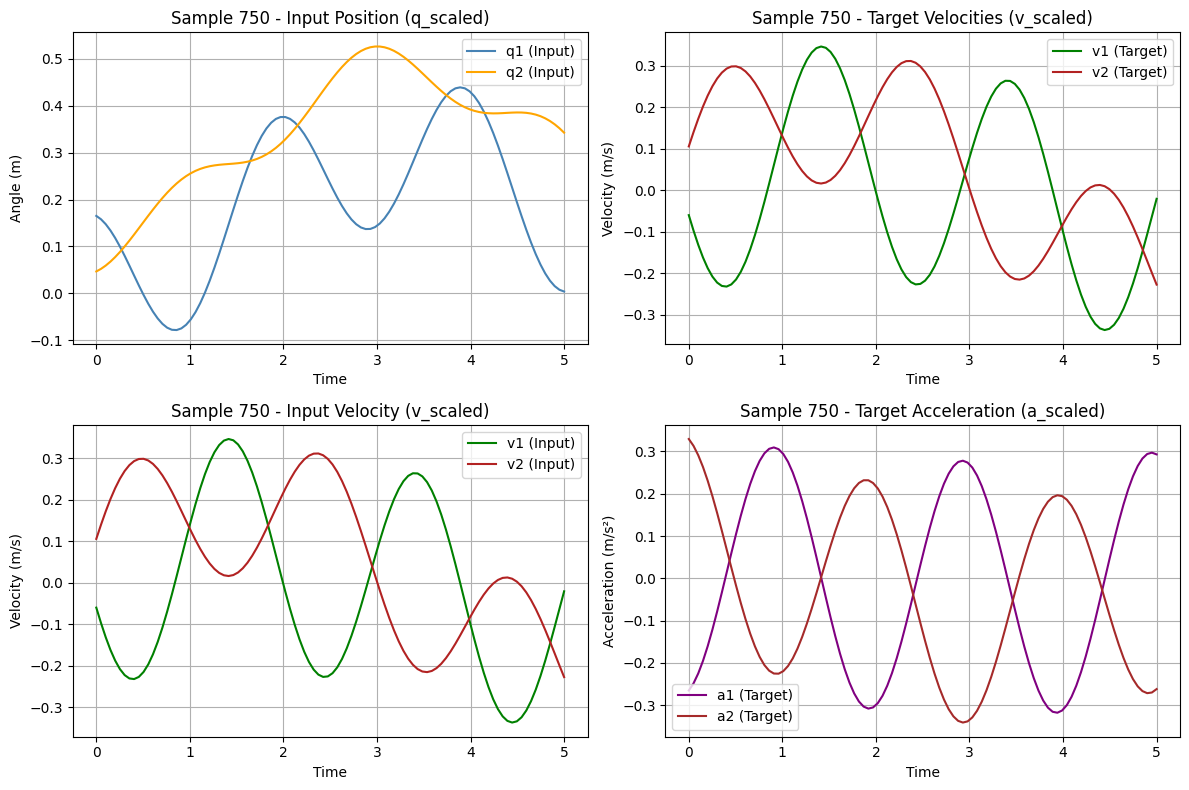

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

#　the time grid
M = 100
tend = 5.0
t_eval = np.linspace(0,tend,M)
dt = t_eval[1]-t_eval[0]
num = 1000 # 상태벡터 초기값 샘플 수

for i in range(num):
  if i % 250 == 0:
    print(f'Sample {i} / {num} processed.')

    plt.figure(figsize=(12, 8)) # 2x2 layout

    # Subplot 1 (Top-Left): Input q1, q2
    plt.subplot(2, 2, 1)
    plt.title(f'Sample {i} - Input Position (q_scaled)')
    plt.plot(t_eval, x_input_scaled[i*M:(i+1)*M, 0], label='q1 (Input)', color='steelblue')
    plt.plot(t_eval, x_input_scaled[i*M:(i+1)*M, 1], label='q2 (Input)', color='orange')
    plt.xlabel('Time')
    plt.ylabel('Angle (m)')
    plt.grid(True)
    plt.legend()

    # Subplot 2 (Top-Right): Derivatives of Target q (i.e., dq1/dt, dq2/dt)
    plt.subplot(2, 2, 2)
    plt.title(f'Sample {i} - Target Velocities (v_scaled)')
    plt.plot(t_eval, x_target_scaled[i*M:(i+1)*M, 0], label='v1 (Target)', color='g')
    plt.plot(t_eval, x_target_scaled[i*M:(i+1)*M, 1], label='v2 (Target)', color='firebrick')
    plt.xlabel('Time')
    plt.ylabel('Velocity (m/s)')
    plt.grid(True)
    plt.legend()


    # Subplot 3 (Bottom-Left): Input v1, v2
    # Because v1, v2 of Input are the derivatives of q1, q2, they are the same as v1, v2 of Top-Right.
    plt.subplot(2, 2, 3)
    plt.title(f'Sample {i} - Input Velocity (v_scaled)')
    plt.plot(t_eval, x_input_scaled[i*M:(i+1)*M, 2], label='v1 (Input)', color='g')
    plt.plot(t_eval, x_input_scaled[i*M:(i+1)*M, 3], label='v2 (Input)', color='firebrick')
    plt.xlabel('Time')
    plt.ylabel('Velocity (m/s)')
    plt.grid(True)
    plt.legend()

    # Subplot 4 (Bottom-Left): Derivatives of Target v (i.e., Acceleration)
    plt.subplot(2, 2, 4)
    plt.title(f'Sample {i} - Target Acceleration (a_scaled)')
    plt.plot(t_eval, x_target_scaled[i*M:(i+1)*M, 2], label='a1 (Target)', color='purple')
    plt.plot(t_eval, x_target_scaled[i*M:(i+1)*M, 3], label='a2 (Target)', color='brown')
    plt.xlabel('Time')
    plt.ylabel('Acceleration (m/s²)')
    plt.grid(True)
    plt.legend()


    plt.tight_layout()
    plt.show()
